In [1]:
## allow plots inside notebook
%matplotlib inline

In [2]:
## launch console
#%qtconsole

In [3]:
## setup
import hddm
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\dbang\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [4]:
## PATCH 1: Get around a problem with saving HDDM output in Python 3
def savePatch(self, fname):
    import pickle
    with open(fname, 'wb') as f:
        pickle.dump(self, f)
hddm.HDDM.savePatch = savePatch

In [5]:
## load data
data = hddm.load_csv('hddm_input_scan.csv');

In [7]:
## prepare model
model = hddm.HDDM(data, depends_on={'a': 'condition','v': 'condition','t': 'condition'},
                  include=('sv','st'))

In [8]:
## find MAP starting points
model.find_starting_values()

In [9]:
## create model and start MCMC sampling -- dbname='traces.db', db='pickle'
model.sample(5000, burn=200,dbname='model',db='pickle')

 [-----------------100%-----------------] 5001 of 5000 complete in 12260.9 sec

In [10]:
## save model output
model.savePatch('hddm_fit_prescan_output')

In [14]:
## print all stats -- DMAT simulations based on group mean parameters
model.print_stats()

                    mean         std         2.5q         25q        50q        75q     97.5q       mc err
a(1)             2.25297   0.0984641      2.05581     2.18563    2.25406    2.31904   2.44331   0.00199164
a(2)             2.24895    0.103944      2.04471     2.17906    2.24952    2.31786   2.45187   0.00231218
a(3)             2.14995   0.0999898       1.9513      2.0825    2.15079    2.21747   2.34763    0.0021396
a(4)             2.05229    0.113231      1.83093     1.97619    2.05143    2.12764   2.27699   0.00319032
a(5)             2.21586   0.0972226      2.02996     2.15051    2.21585    2.28057   2.40658   0.00186729
a(6)              2.2203    0.100032      2.01855     2.15496     2.2222    2.28858   2.41496   0.00207738
a(7)             2.21653   0.0979311      2.02163     2.15201    2.21766    2.28195   2.41097    0.0018876
a(8)             2.28067    0.106553      2.06735     2.21107    2.28229     2.3511   2.48908   0.00244466
a_std           0.553314   0.0313035 

In [15]:
## print drift rates
stats= model.gen_stats()
stats[stats.index.isin(['v(1)','v(2)','v(3)','v(4)','v(5)','v(6)','v(7)','v(8)'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v(1),0.583445,0.0698948,0.448082,0.535467,0.583762,0.63035,0.723777,0.00134516
v(2),1.34402,0.0756951,1.19675,1.29316,1.34306,1.39397,1.49377,0.00197229
v(3),1.94286,0.0827709,1.78289,1.88607,1.94278,1.99675,2.1098,0.00270361
v(4),2.32838,0.102894,2.13098,2.25976,2.32708,2.39596,2.53407,0.00381435
v(5),0.22611,0.0691264,0.0923681,0.178779,0.225382,0.272838,0.359431,0.00125184
v(6),0.513635,0.0695361,0.378722,0.466506,0.514192,0.559748,0.650495,0.00140639
v(7),0.792184,0.0716542,0.652025,0.743882,0.791869,0.8401,0.928909,0.00152934
v(8),0.955584,0.0821969,0.799308,0.899964,0.954041,1.0105,1.12097,0.00219761


In [16]:
## print thresholds
stats= model.gen_stats()
stats[stats.index.isin(['a(1)','a(2)','a(3)','a(4)','a(5)','a(6)','a(7)','a(8)'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a(1),2.25297,0.0984641,2.05581,2.18563,2.25406,2.31904,2.44331,0.00199164
a(2),2.24895,0.103944,2.04471,2.17906,2.24952,2.31786,2.45187,0.00231218
a(3),2.14995,0.0999898,1.9513,2.0825,2.15079,2.21747,2.34763,0.0021396
a(4),2.05229,0.113231,1.83093,1.97619,2.05143,2.12764,2.27699,0.00319032
a(5),2.21586,0.0972226,2.02996,2.15051,2.21585,2.28057,2.40658,0.00186729
a(6),2.2203,0.100032,2.01855,2.15496,2.2222,2.28858,2.41496,0.00207738
a(7),2.21653,0.0979311,2.02163,2.15201,2.21766,2.28195,2.41097,0.0018876
a(8),2.28067,0.106553,2.06735,2.21107,2.28229,2.3511,2.48908,0.00244466


In [17]:
## print non-decision times
stats= model.gen_stats()
stats[stats.index.isin(['t(1)','t(2)','t(3)','t(4)','t(5)','t(6)','t(7)','t(8)'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
t(1),1.50189,0.0245447,1.45256,1.48551,1.50236,1.51848,1.54857,0.000469009
t(2),1.49984,0.0245225,1.45158,1.48326,1.50008,1.51645,1.54827,0.000449948
t(3),1.51885,0.0240599,1.47202,1.50303,1.5186,1.53527,1.56541,0.000459321
t(4),1.54588,0.0252068,1.49732,1.52891,1.54602,1.56286,1.59555,0.000550418
t(5),1.50147,0.0244714,1.45298,1.48484,1.50134,1.5182,1.54968,0.000468176
t(6),1.50579,0.0241237,1.45795,1.48959,1.50612,1.52184,1.55285,0.00043395
t(7),1.48036,0.0244959,1.43125,1.46406,1.48067,1.49676,1.52879,0.000402043
t(8),1.4901,0.0257475,1.43997,1.47284,1.48965,1.50759,1.54102,0.000516806


Plotting a(1)
Plotting a(2)
Plotting a(3)
Plotting a(4)
Plotting a(5)
Plotting a(6)
Plotting a(7)
Plotting a(8)
Plotting a_std
Plotting v(1)
Plotting v(2)
Plotting v(3)
Plotting v(4)
Plotting v(5)
Plotting v(6)
Plotting v(7)
Plotting v(8)
Plotting v_std
Plotting t(1)
Plotting t(2)
Plotting t(3)
Plotting t(4)
Plotting t(5)
Plotting t(6)
Plotting t(7)
Plotting t(8)
Plotting t_std
Plotting sv
Plotting st


C:\Users\dbang\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


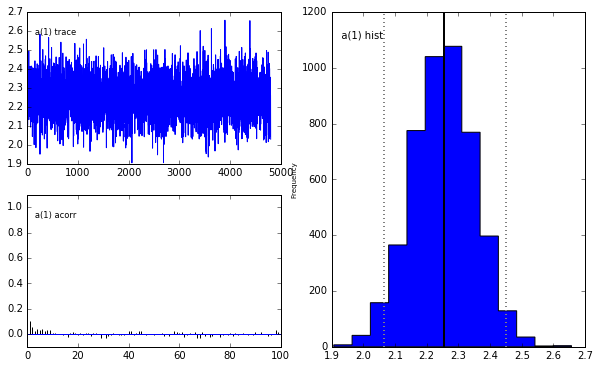

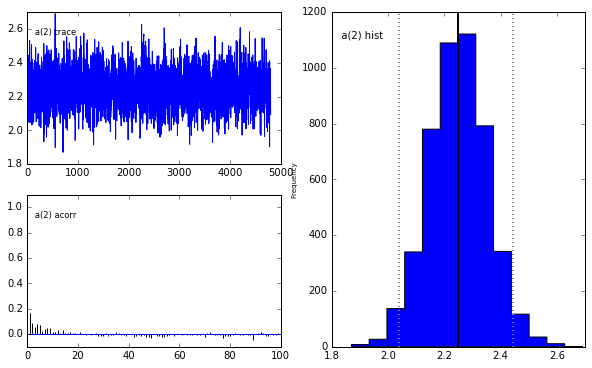

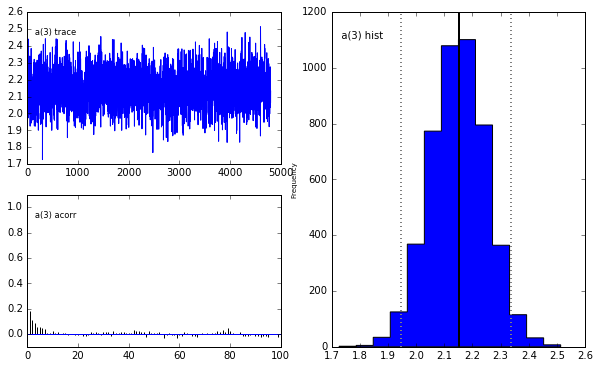

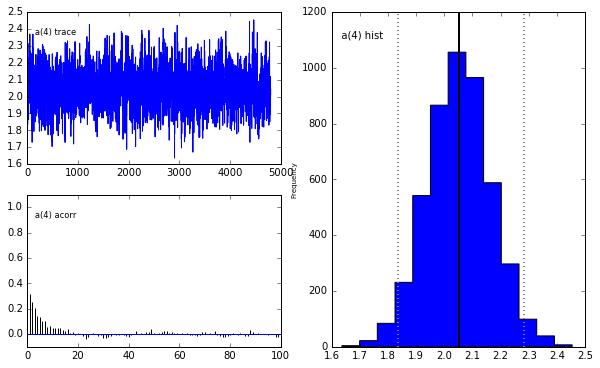

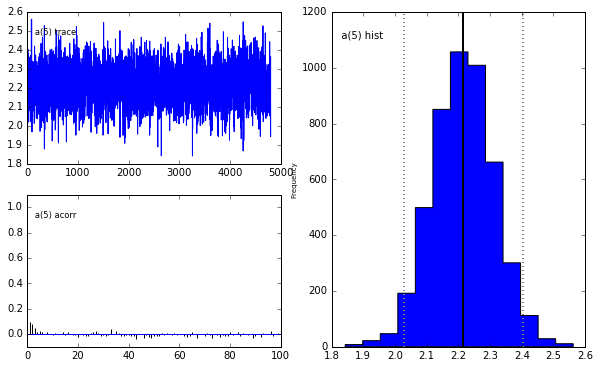

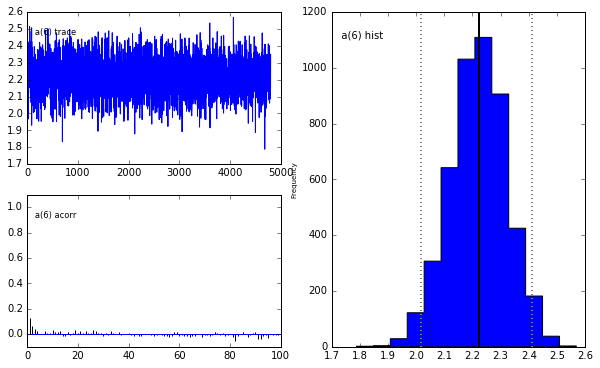

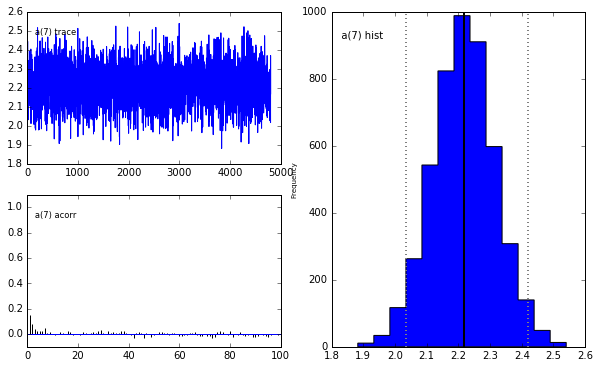

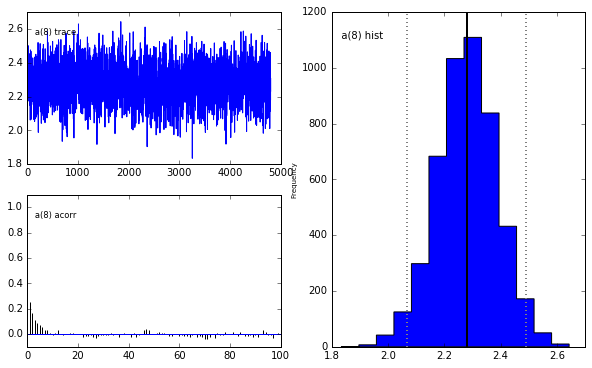

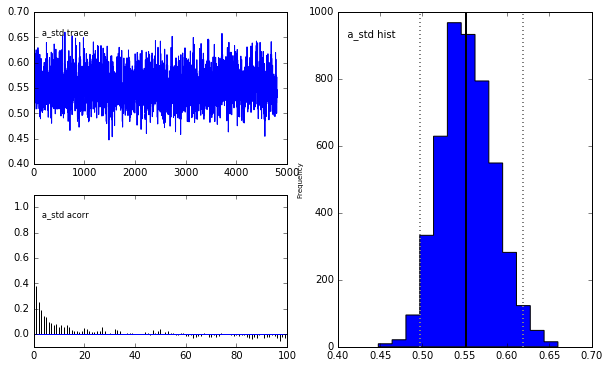

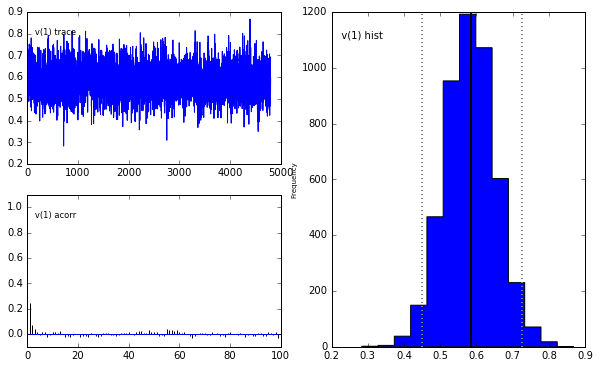

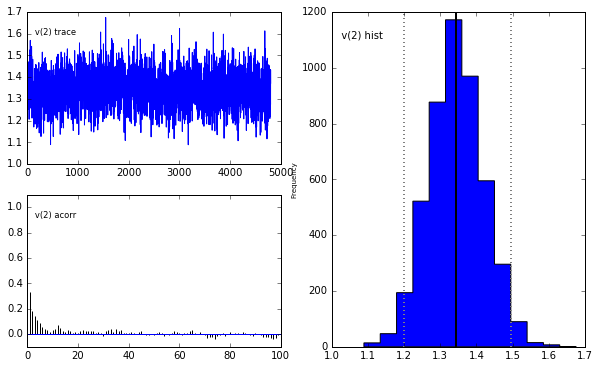

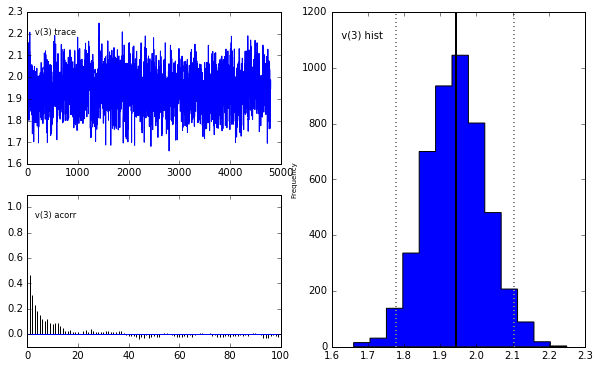

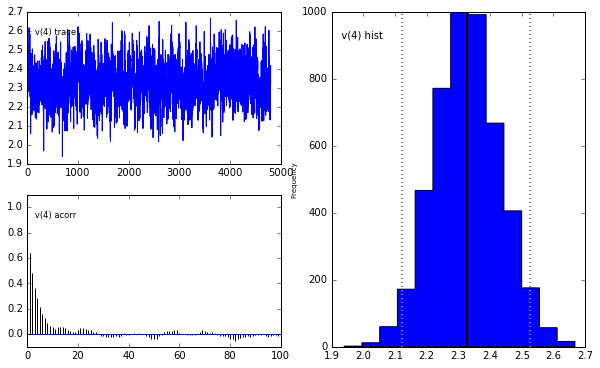

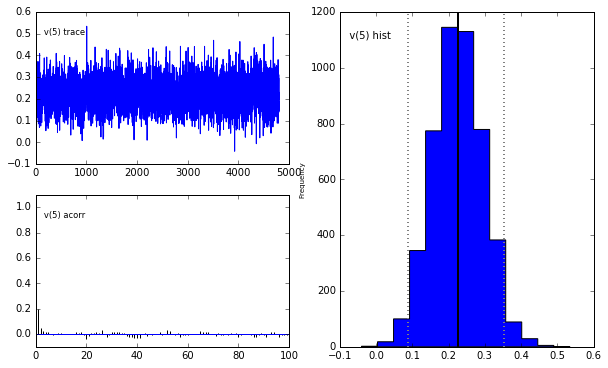

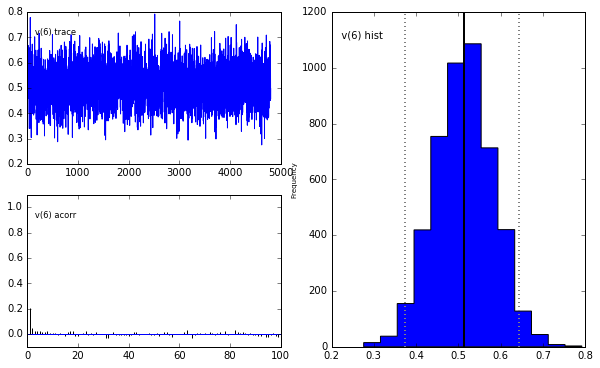

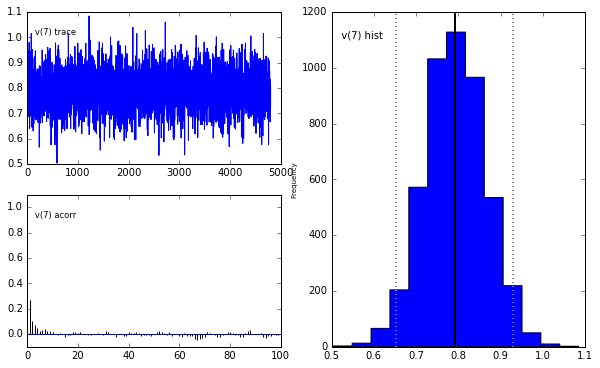

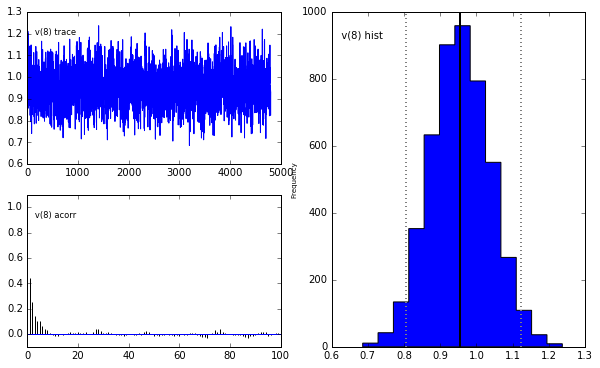

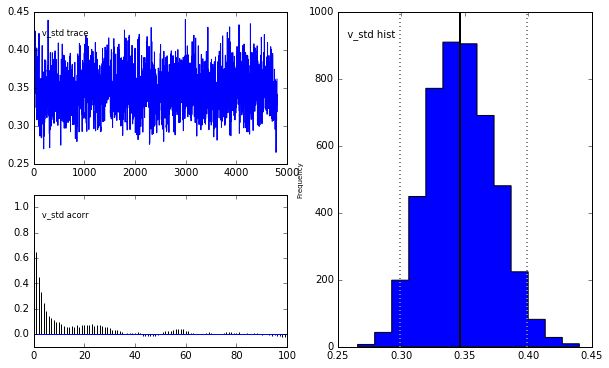

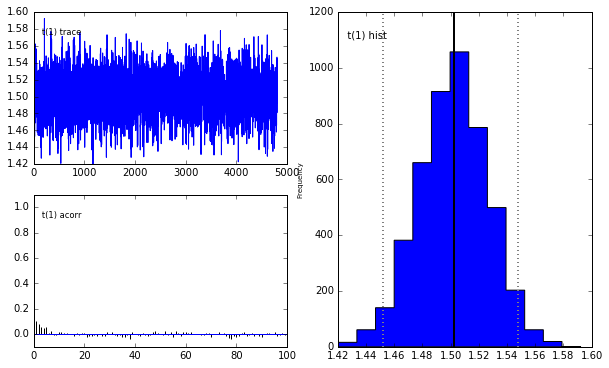

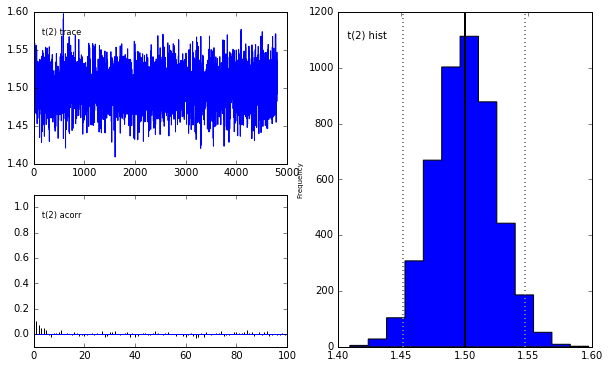

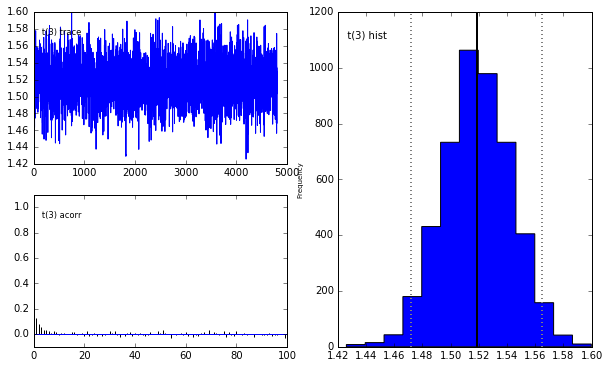

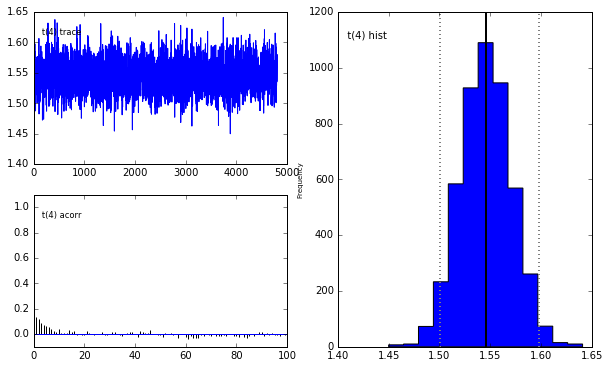

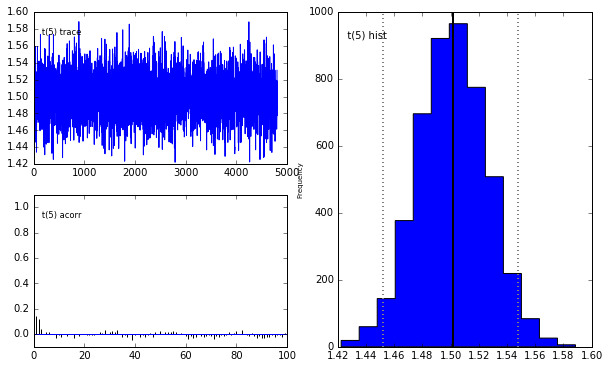

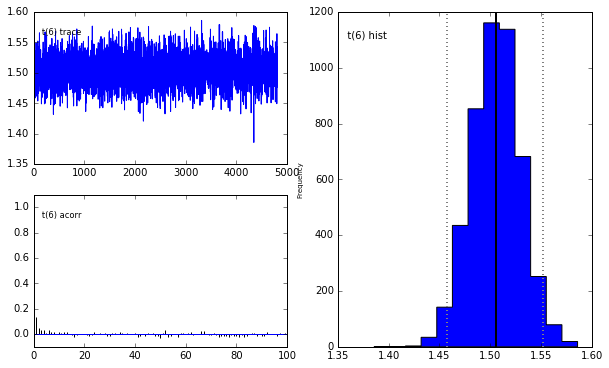

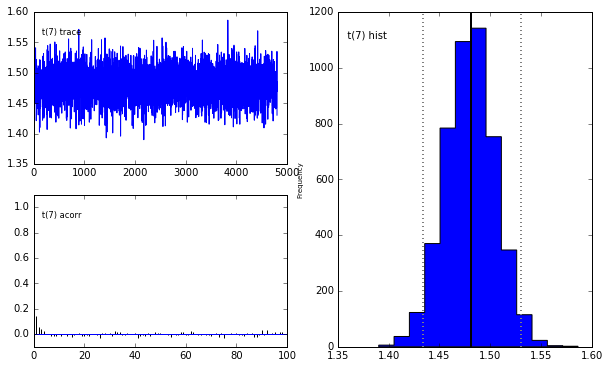

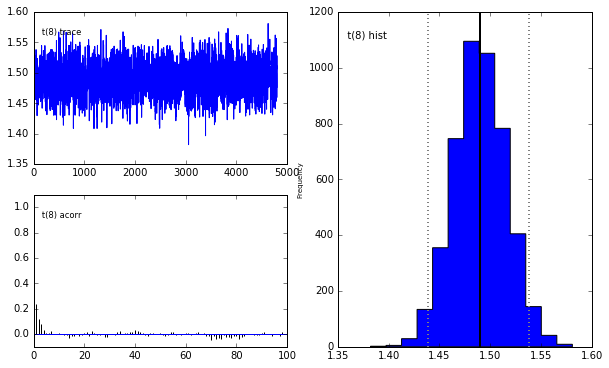

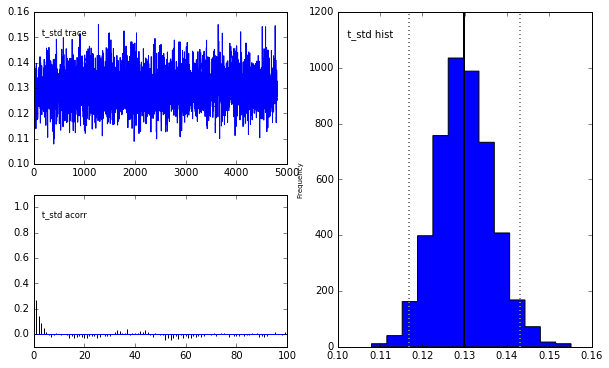

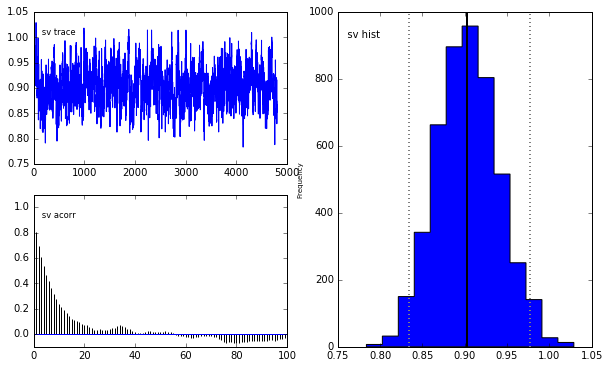

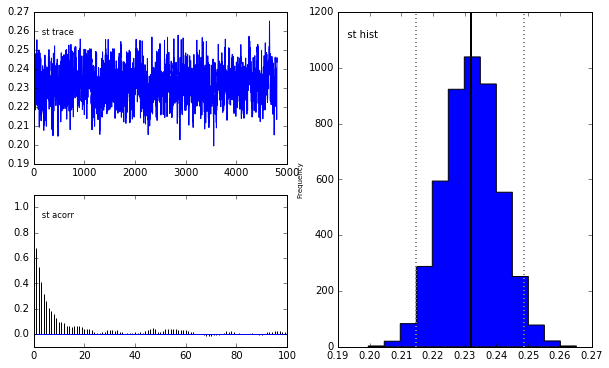

In [18]:
## plot all posteriors and inspect MCMC traces
model.plot_posteriors()

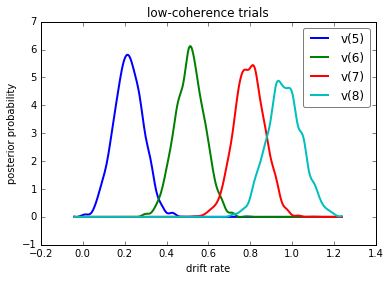

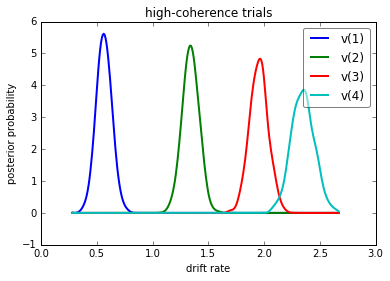

In [19]:
## plot posteriors over drift-rates
HCD1, HCD2, HCD3, HCD4, LCD1, LCD2, LCD3, LCD4 = model.nodes_db.node[['v(1)', 'v(2)', 'v(3)', 'v(4)','v(5)','v(6)','v(7)','v(8)']]
hddm.analyze.plot_posterior_nodes([LCD1, LCD2, LCD3, LCD4])
plt.xlabel('drift rate')
plt.ylabel('posterior probability')
plt.title('low-coherence trials')
hddm.analyze.plot_posterior_nodes([HCD1, HCD2, HCD3, HCD4])
plt.xlabel('drift rate')
plt.ylabel('posterior probability')
plt.title('high-coherence trials')

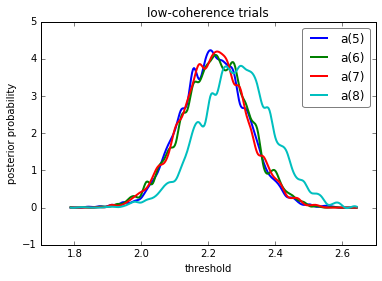

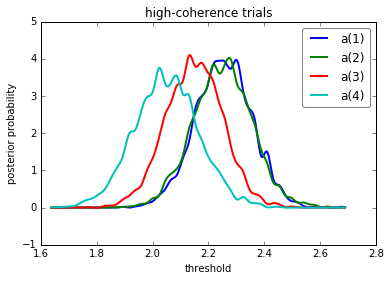

In [20]:
## plot posteriors over thresholds
HCD1, HCD2, HCD3, HCD4, LCD1, LCD2, LCD3, LCD4 = model.nodes_db.node[['a(1)', 'a(2)', 'a(3)', 'a(4)','a(5)','a(6)','a(7)','a(8)']]
hddm.analyze.plot_posterior_nodes([LCD1, LCD2, LCD3, LCD4])
plt.xlabel('threshold')
plt.ylabel('posterior probability')
plt.title('low-coherence trials')
hddm.analyze.plot_posterior_nodes([HCD1, HCD2, HCD3, HCD4])
plt.xlabel('threshold')
plt.ylabel('posterior probability')
plt.title('high-coherence trials')

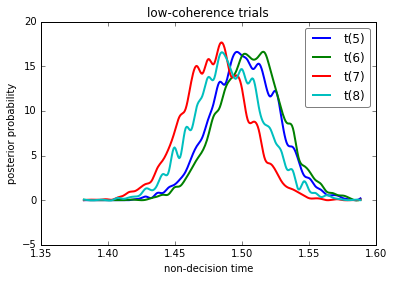

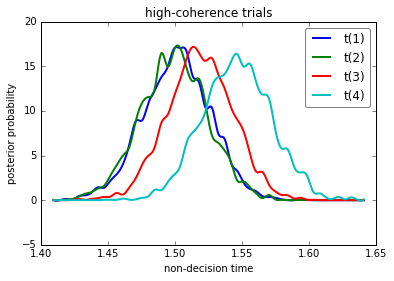

In [21]:
## plot posteriors over non-decision times
HCD1, HCD2, HCD3, HCD4, LCD1, LCD2, LCD3, LCD4 = model.nodes_db.node[['t(1)', 't(2)', 't(3)', 't(4)','t(5)','t(6)','t(7)','t(8)']]
hddm.analyze.plot_posterior_nodes([LCD1, LCD2, LCD3, LCD4])
plt.xlabel('non-decision time')
plt.ylabel('posterior probability')
plt.title('low-coherence trials')
hddm.analyze.plot_posterior_nodes([HCD1, HCD2, HCD3, HCD4])
plt.xlabel('non-decision time')
plt.ylabel('posterior probability')
plt.title('high-coherence trials')

In [1]:
## plot predicted RT distributions for error (left) and correct (right) trials
model.plot_posterior_predictive()

NameError: name 'model' is not defined